# Hierarchical  Clustering

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [35]:
df=pd.read_csv("football_data.csv")
#considering only numeric data
position = np.array(df['Position'])
df=df.select_dtypes(exclude=['object'])
df = df.dropna()
#considering the imp attributes only
cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']
df = df[ cols]
#scaling the data for better results
scaler = MinMaxScaler()
data = scaler.fit_transform(df)



# Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

print(cluster.labels_)
print(len(set(cluster.labels_)))

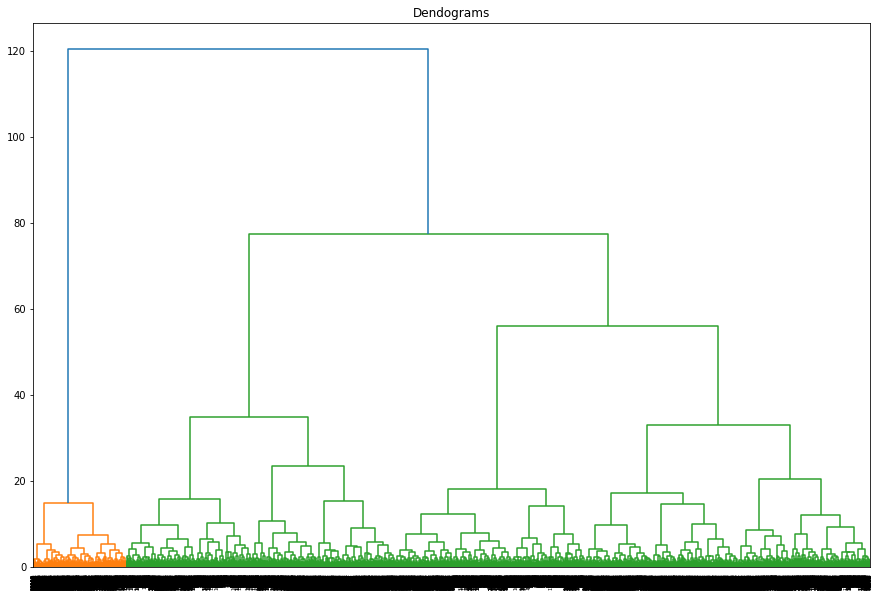

In [19]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Scikit learn does not provide dendrograms so we used the dendrograms of SciPy package.

# Divisive Hierarchical Clustering Method

Github Code Link Shared on Moodle Referred for understandind DIANA 

# Analysis of Cluster generated from Hierarchical Clustering

In [44]:
df=pd.read_csv("football_data.csv")
col = [21]
col += range(54, 83)
df = df.iloc[:, col]
df = df.dropna()
position = np.array(df['Position'])
data = df.drop(['Position'], axis = 1)
#scaling the data for better results
X=data.to_numpy()
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data.to_numpy())
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

labels=cluster.labels_
comp = []
for i in range(0, len(position)):
    ele = tuple((position[i], labels[i]))
    comp.append(ele)

In [45]:
clusts= {}
#adding 4 empty dicts 1 for each cluster
clusts[0]={}
clusts[1]={}
clusts[2]={}
clusts[3]={}
for i in comp:
    d = clusts[i[1]]
    if i[0] not in d.keys():
        clusts[i[1]][i[0]] = 1
    else :
        clusts[i[1]][i[0]] += 1


In [50]:
import plotly.express as px
print("Cluster 1")
pos=list()
count=list()
for j in clusts[0]:
    pos.append(j)
    count.append(clusts[0][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(0),width=600,height=400)
fig.show()


Cluster 1


In [47]:
print("Cluster 2")
pos=list()
count=list()
for j in clusts[1]:
    pos.append(j)
    count.append(clusts[1][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(1),width=600,height=400)
fig.show()


Cluster 2


In [48]:
print("Cluster 3")
pos=list()
count=list()
for j in clusts[2]:
    pos.append(j)
    count.append(clusts[2][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(2),width=600,height=400)
fig.show()


Cluster 3


In [49]:
print("Cluster 4")
pos=list()
count=list()
for j in clusts[3]:
    pos.append(j)
    count.append(clusts[3][j])
    #making a pandas df to store this
d = pd.DataFrame()
d['pos'] = pos
d['count'] = count
d = d.sort_values(by=['count'])
fig = px.bar(d, x="count", y="pos",title="Cluster "+str(3),width=600,height=400)
fig.show()


Cluster 4


Applying PCA and trying to plot this for better visualizations

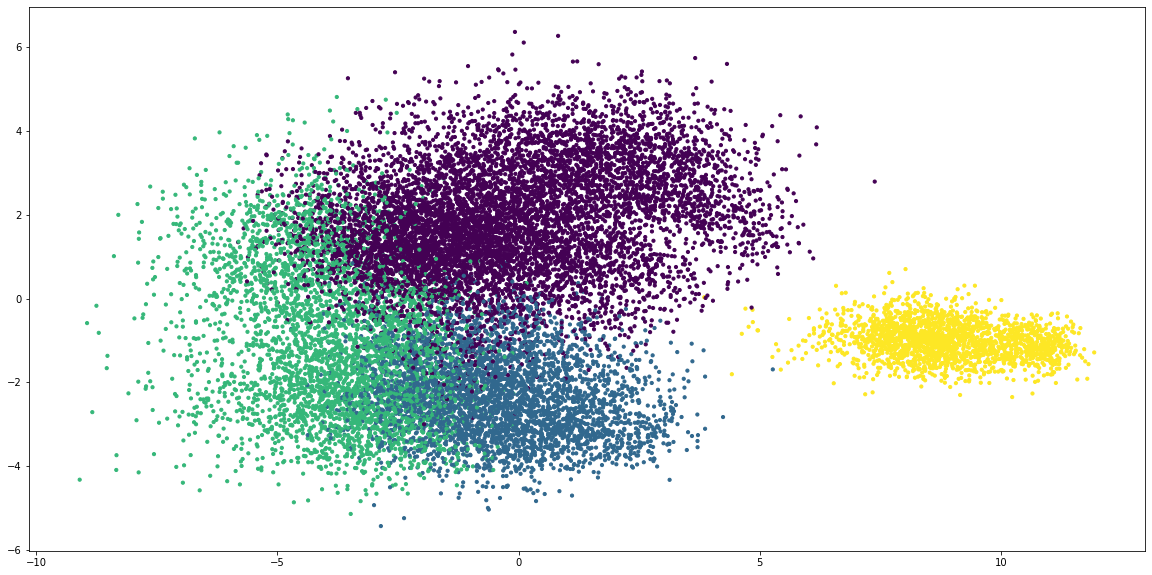

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
skillsPCA = pca.fit_transform(X)
PCA_dataset1 = pd.DataFrame(data =skillsPCA , columns = ['c1', 'c2'] )
X=PCA_dataset1.to_numpy()
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)

In depth Analysis of Hierarchical Clustering done in report .